**Recommendation System for Online Learning Platforms
Inspired by: Coursera, Udemy, Byju's**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
df = pd.read_csv("coursera_courses.csv")

In [15]:
df.shape

(1000, 12)

In [16]:
df.columns

Index(['course_title', 'course_organization', 'course_certificate_type',
       'course_time', 'course_rating', 'course_reviews_num',
       'course_difficulty', 'course_url', 'course_students_enrolled',
       'course_skills', 'course_summary', 'course_description'],
      dtype='object')

In [17]:
df.head()

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,492,Beginner,https://www.coursera.org/specializations/sscp-...,"6,958","['Risk Management', 'Access Control', 'Asset',...",[],Pursue better IT security job opportunities an...
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,51,Intermediate,https://www.coursera.org/specializations/dot-n...,"2,531","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,62,Beginner,https://www.coursera.org/learn/21st-century-en...,"4,377",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,517,Intermediate,https://www.coursera.org/learn/crash-course-in...,"39,004","['Instrumental Variable', 'Propensity Score Ma...",[],We have all heard the phrase “correlation does...
4,A life with ADHD,University of Geneva,Course,1 - 3 Months,NaN,NaN,Beginner,https://www.coursera.org/learn/life-with-adhd,NaN,"['differential diagnosis and comorbidities', '...",[' Understand what ADHD is and the challenges ...,What is ADHD and what are the challenges that ...


In [18]:
df.tail()

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
995,Étudier en France: French Intermediate course ...,École Polytechnique,Course,1 - 3 Months,4.8,4.6k,Intermediate,https://www.coursera.org/learn/etudier-en-france,"519,333",[],[],Ce cours de français de niveau intermédiaire B...
996,Цифровий маркетинг і електронна комерція від G...,Google,Professional Certificate,3 - 6 Months,4.9,1.2k,Beginner,https://www.coursera.org/professional-certific...,"7,630","['Медійна реклама', 'Маркетинг', 'Маркетинг ел...",['Ви вивчите основи цифрового маркетингу та ел...,"За менш ніж шість місяців, без досвіду або спе..."
997,تحليلات البيانات من Google,Google,Professional Certificate,3 - 6 Months,4.8,156,Beginner,https://www.coursera.org/professional-certific...,"2,701","['مؤثرات عرض البيانات (DataViz)', 'R Markdown'...",['اكتساب فهم شامل للممارسات والعمليات التي يست...,استعد لمهنة جديدة في مجال تحليلات البيانات عال...
998,用 Python 做商管程式設計（一）(Programming for Business C...,National Taiwan University,Course,1 - 3 Months,4.9,814,Beginner,https://www.coursera.org/learn/pbc1,"38,595",[],[],本系列課程從零開始，教授一般認為最適合初學者的程式語言「Python」，目標是讓大家在完成本...
999,用 Python 做商管程式設計（二）(Programming for Business C...,National Taiwan University,Course,1 - 4 Weeks,4.6,249,Intermediate,https://www.coursera.org/learn/pbc2,"10,432",[],[],接續用 Python 做商管程式設計（一）的內容，我們將在這個課程中繼續探討Python語言...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              1000 non-null   object 
 1   course_organization       1000 non-null   object 
 2   course_certificate_type   1000 non-null   object 
 3   course_time               1000 non-null   object 
 4   course_rating             994 non-null    float64
 5   course_reviews_num        994 non-null    object 
 6   course_difficulty         1000 non-null   object 
 7   course_url                1000 non-null   object 
 8   course_students_enrolled  959 non-null    object 
 9   course_skills             1000 non-null   object 
 10  course_summary            1000 non-null   object 
 11  course_description        999 non-null    object 
dtypes: float64(1), object(11)
memory usage: 93.9+ KB


In [20]:
df.isnull().sum()

course_title                 0
course_organization          0
course_certificate_type      0
course_time                  0
course_rating                6
course_reviews_num           6
course_difficulty            0
course_url                   0
course_students_enrolled    41
course_skills                0
course_summary               0
course_description           1
dtype: int64

In [21]:
#Selecting Relevant Columns
use_df = df[
    [
        "course_title",
        "course_organization",
        "course_difficulty",
        "course_rating",
        "course_students_enrolled",
        "course_description",
        "course_skills"
    ]
].copy()

In [22]:
use_df.dropna(inplace=True)

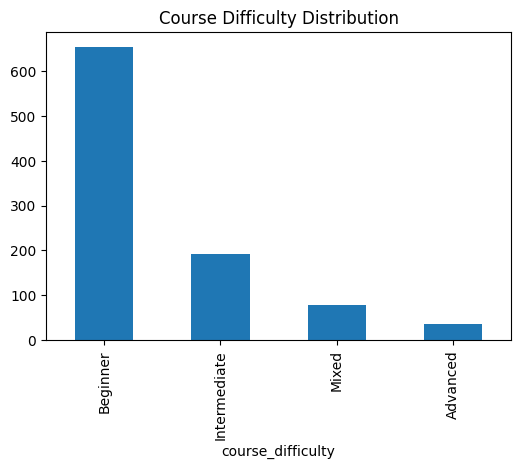

In [23]:
#Exploratory Data Analysis (EDA)
#Course Difficulty Distribution
plt.figure(figsize=(6,4))
use_df["course_difficulty"].value_counts().plot(kind="bar")
plt.title("Course Difficulty Distribution")
plt.show()

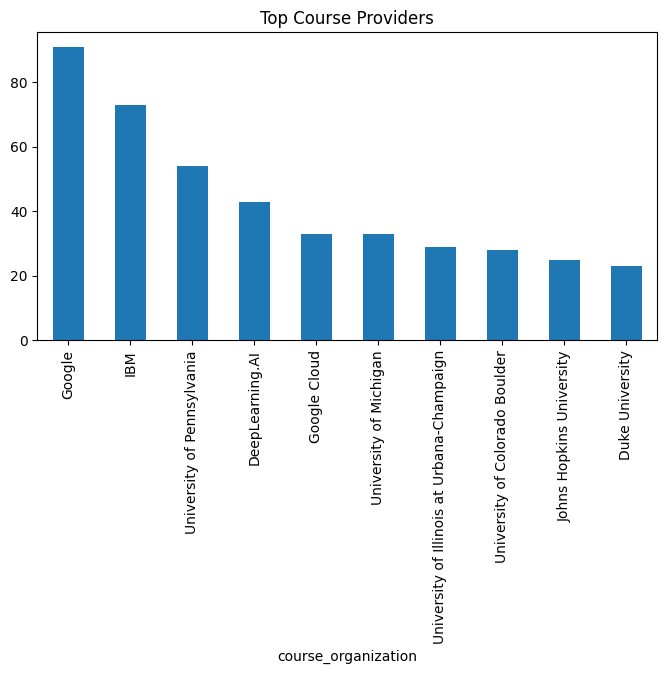

In [25]:
#Top Course Providers
plt.figure(figsize=(8,4))
use_df["course_organization"].value_counts().head(10).plot(kind="bar")
plt.title("Top Course Providers")
plt.show()

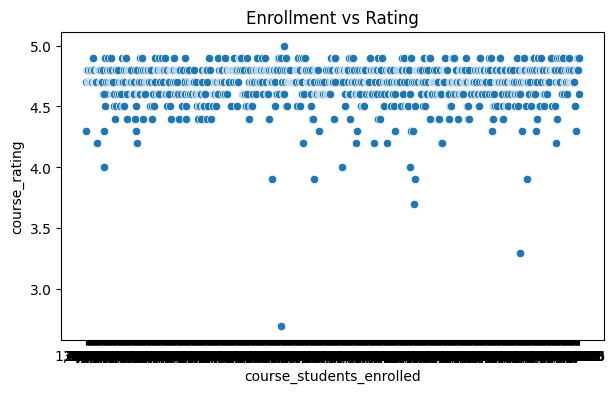

In [26]:
#Rating vs Enrollment
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=use_df,
    x="course_students_enrolled",
    y="course_rating"
)
plt.title("Enrollment vs Rating")
plt.show()

In [27]:
#Feature Engineering (Text Combination)
#We create a course profile using textual data.

use_df["combined_text"] = (
    use_df["course_description"] + " " +
    use_df["course_skills"] + " " +
    use_df["course_difficulty"]
)

In [28]:
#TF-IDF Vectorization (Content-Based Filtering)
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000
)

tfidf_matrix = tfidf.fit_transform(use_df["combined_text"])

In [29]:
#Similarity Computation
cosine_sim = cosine_similarity(tfidf_matrix)

In [30]:
#Course Recommendation Function
def recommend_courses(user_interest, top_n=5):
    user_interest = user_interest.lower()
    user_vec = tfidf.transform([user_interest])
    
    similarity_scores = cosine_similarity(user_vec, tfidf_matrix)
    top_indices = similarity_scores[0].argsort()[-top_n:][::-1]
    
    return use_df.iloc[top_indices][
        [
            "course_title",
            "course_organization",
            "course_difficulty",
            "course_rating"
        ]
    ]


In [32]:
#Take User Input (Simulating Learner Profile)
user_input = input(
    "Enter your learning interests, skills, and goal: "
)
recommend_courses(user_input)

,course_title,course_organization,course_difficulty,course_rating
998,用 Python 做商管程式設計（一）(Programming for Business C...,National Taiwan University,Beginner,4.9
68,Applied Data Science with R,IBM,Beginner,4.5
561,Introduction to Deep Learning & Neural Network...,IBM,Intermediate,4.5
829,"Python for Data Science, AI & Development",IBM,Beginner,4.6
494,IBM Introduction to Machine Learning,IBM,Intermediate,4.6
